We apply k-means clustering to analyze housing data <br>
In general, to do clustering, we need <br>
(1) feature vectors of objects <br>
(2) a distance measure (or a similarity measure) <br>
The result may vary if you change (1) and/or (2) <br>
In standard k-means, L2 norm based distance measure is used. <br>
Thus, k-means clustering result is largely determined by (1) <br>
In this task, we will select different sets of feature components for clustering with different goals. <br>


Each row contains the information of an area in the state of california. Thus, an area in the state of california is an object in this application.

In [1]:
import numpy as np

In [2]:
#we need to import the package pandas to read data files
#we give it a new name 'pd', easy to remember and use
import pandas as pd
#the table is in the file housing.csv
housing = pd.read_csv("housing.csv")
#use head function to show the first five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# type of variable 'housing' is pandas DataFrame
# it is very important to know the types of variables
# because functions may only work with specific types of variables.
type(housing)

pandas.core.frame.DataFrame

In [4]:
# get the general information of the DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# get some statistics
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [6]:
#check to see if there is nan in the table
#nan indicates missing value
#do not worry, in this task, we will not use total_bedrooms
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# get one column of the DataFrame
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [8]:
# get two columns of the DataFrame
table1=housing[['longitude', 'latitude']]
table1.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [9]:
type(table1)

pandas.core.frame.DataFrame

In [10]:
# type of table1 is DataFrame
# functions in sk-learn may not work well with DataFrame
# often, we need to convert DataFrame to numpy array
table1=table1.values
type(table1)

numpy.ndarray

In [11]:
# it is a 2D array
table1.shape

(20640, 2)

In [12]:
# get an element at row-i and column-j of table1
i=1; j=0
table1[i,j]

-122.22

In [13]:
# get row-0 from table1
table1[0,:]

array([-122.23,   37.88])

In [14]:
# get column-0 from table1
table1[:,0]

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

For more information about numpy array, see the lecture notes

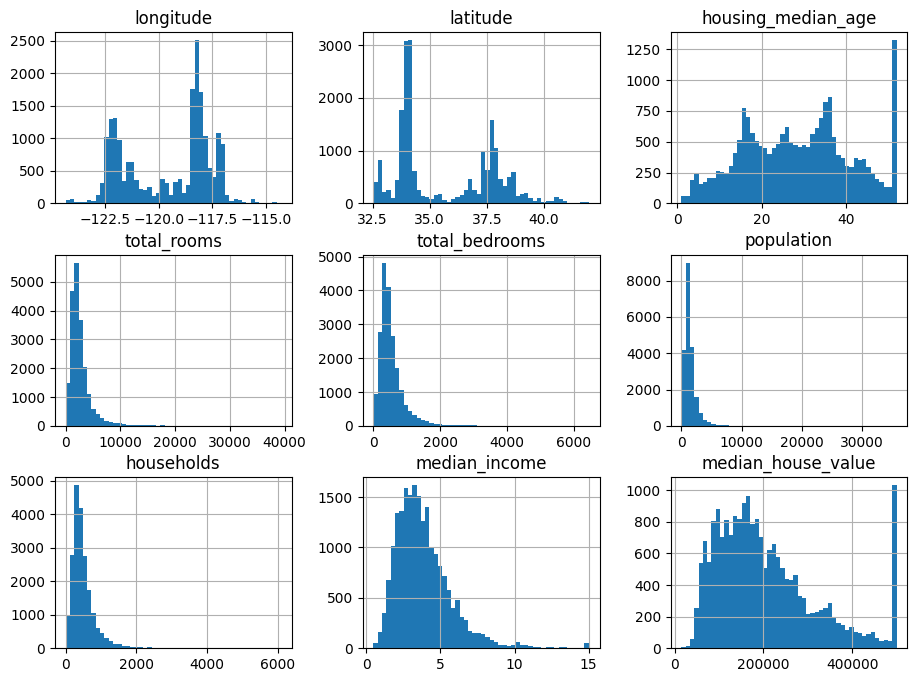

In [15]:
# show the histograms: one histogram corresponds to one column
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(11,8))
plt.show()

<Axes: >

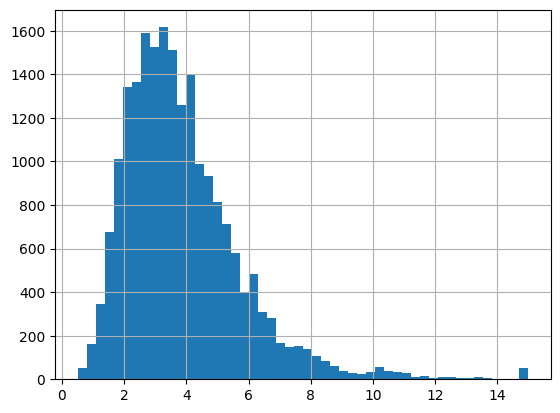

In [16]:
#show the histogram of a column
housing["median_income"].hist(bins=50)

When we set bins=50, it means that the data will be divided into 50 equal-sized intervals (or bins) along the range of the data.

The histogram will then display how many data points fall into each of these 50 bins.

A higher number of bins (e.g., 50) can provide a more detailed view of the data's distribution and can reveal finer-grained patterns or variations in the data.



<Axes: >

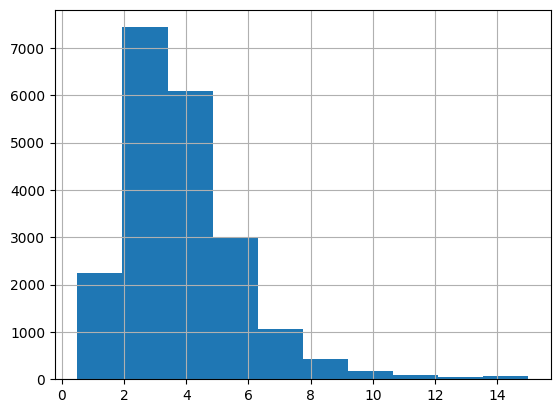

In [17]:
housing["median_income"].hist(bins=10)

### visualize the data points using pandas buil-in funciton plot

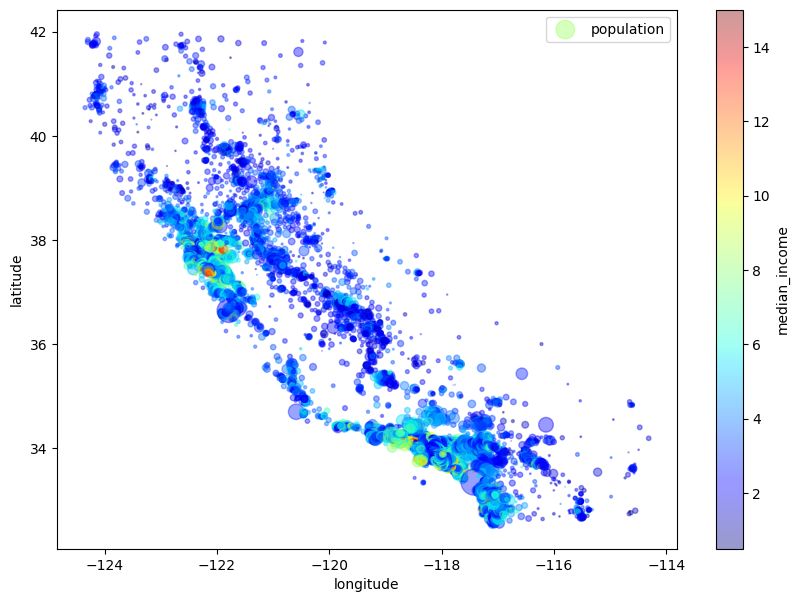

In [18]:
#each dot represents an area
#the color of a dot shows the median_income in that area
#the size of a dot shows the population in that area
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, 
    label="population",
    c="median_income", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

### visualize the data points on the map of california using matplotlib

Text(0.5, 0, 'Longitude')

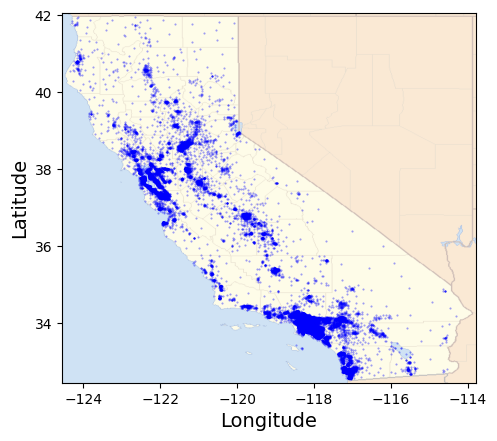

In [19]:
# the map is an image,'california.png````'
# we need the function imread from the module io of the package skimage
from skimage.io import imread
#load the map
california_img=imread('california.png')
#show the map
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
#show the data points
#set the size of the dots by s=1
#set the color of the dots by color = 'b' - blue
#make the dots to be somewhat transparent by alpha=0.4
plt.scatter(x=housing['longitude'], y=housing['latitude'], 
            color='b',  marker='.', s=1, alpha=0.4)
#add labels to x-axis and y-axis and set fontsize
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#### Handle the categorical variable "ocean_proximity"
Many machine learning algorithms only accept numerical data (numbers) not categorical data (category names). Thus, we need to convert categorical data into numerical data. <br>
In our table, we have a categorical variable "ocean_proximity". We apply one-hot encoding method (https://en.wikipedia.org/wiki/One-hot) to use numbers to represent different "ocean_proximity", which can be easily done by Pandas.

In [20]:
dummies=pd.get_dummies(housing)


In [21]:
for x in ['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']:
    dummies[x]=dummies[x].astype('int')

In [22]:
dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In the new "housing" table, we see five new columns <br>
(1) ocean_proximity_<1H OCEAN <br>
(2) ocean_proximity_INLAND <br>
(3) ocean_proximity_ISLAND <br>
(4) ocean_proximity_NEAR BAY <br>
(5) ocean_proximity_NEAR OCEAN <br>
These columns are filled with 1s and 0s by the one-hot encoding method. <br>
If 'ocean_proximity' is 'NEAR BAY' in the original table, then in the new table, 'ocean_proximity_NEAR BAY' is 1 and the other variables are 0s.

### 1. cluster the data points based on locations
location features: longitude, latitude, ocean_proximity <br>
you may need to covert pandas DataFrame to numpy array <br>
you need to normalize the features (e.g. MinMaxScaler in sk-learn): see the lecture notes for why you need to do this.

In [23]:
#get a new table by selecting columns related to location
#assume the name of the new table is data1
#for example:
data1 = dummies[['longitude', 'latitude']] #to select only two columns
data1.head() 

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [24]:
#type of data1 is DataFrame
#convert DataFrame to numpy array
data1=data1.values

In [25]:
#normalize data1 using MinMaxScaler in sk-learn
#assume that data1n is the name of the normalized data1 
#    data1 -> normlaization -> data1n
#use fit_transform of MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform your data using the scaler
data1n = scaler.fit_transform(data1)

In [26]:
data1n.shape

(20640, 2)

In [27]:
#run k-means on data1n
#set n_clusters to 3
#read the docmument of k-means on sk-learn website
#assume the cluster labels are stored in the array label1
from sklearn.cluster import KMeans


In [28]:
kmeans=KMeans(n_clusters=3,random_state=0,n_init='auto')

In [29]:
kmeans.fit(data1n)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [30]:
label1=kmeans.labels_

In [31]:
label1

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
data1n[label1==0,0]

array([0.87948207, 0.87948207, 0.88047809, ..., 0.74302789, 0.7559761 ,
       0.75298805])

In [33]:
data1n[label1==0,1]

array([0.06163656, 0.06269926, 0.06163656, ..., 0.01381509, 0.02125399,
       0.00743889])

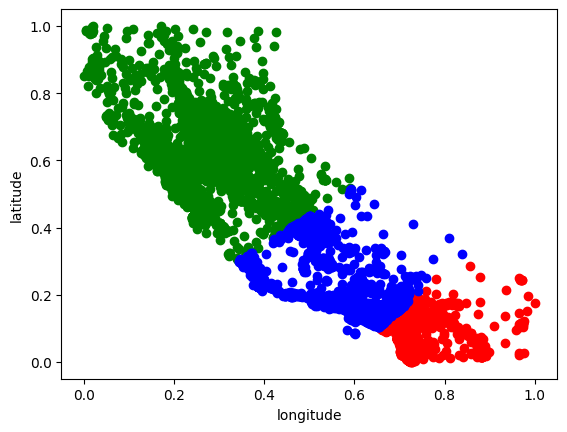

In [34]:
fig, ax= plt.subplots()
ax.scatter(data1n[label1==0,0], data1n[label1==0,1],c='red')
ax.scatter(data1n[label1==1,0], data1n[label1==1,1],c='green')
ax.scatter(data1n[label1==2,0], data1n[label1==2,1],c='blue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

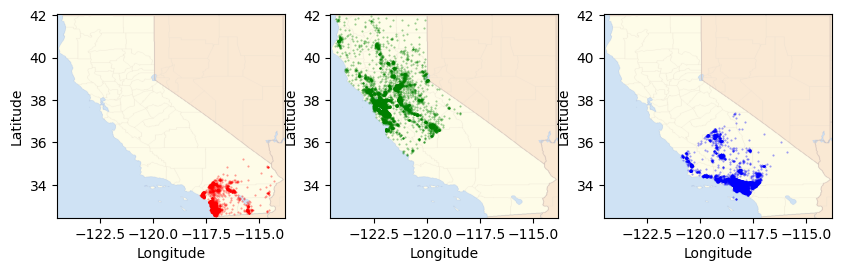

In [35]:
#show the clusters using different colors
#you can choose a color in ['r', 'g', 'b', 'm', 'c', 'y']
#code to get the data points in cluster-k
#  cluster_k=data1[label1==k]
#assume 'longitude' is in column-0 of data1
#code to get longitude values of the data points in cluster-k
#  longitude_k=data1[label1==k, 0]
# sample code is here, assuming three clusters
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,3, figsize=(10,6))
for k in range(0, 3):
    ax[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    ax[k].scatter(x=data1[label1==k,0], y=data1[label1==k,1], 
                  c=color[k],  marker='.', s=1, alpha=0.4)
    ax[k].set_ylabel("Latitude", fontsize=10)
    ax[k].set_xlabel("Longitude", fontsize=10)


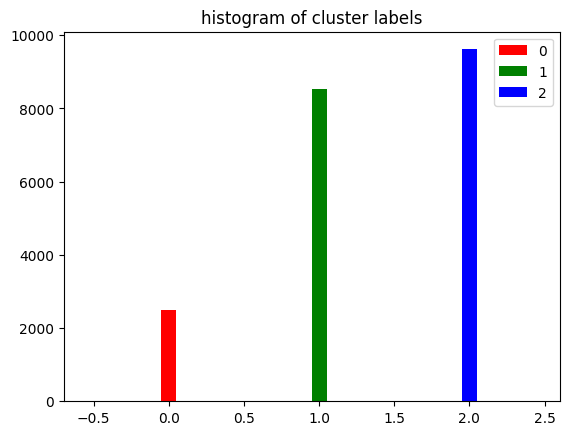

In [36]:
#plot the histogram of cluster labels in label1
fig,ax=plt.subplots()
ax.hist(label1[label1==0],color='red',align='left',label='0')
ax.hist(label1[label1==1],color='green',align='left',label='1')
ax.hist(label1[label1==2],color='blue',align='left',label='2')
ax.legend()
plt.title('histogram of cluster labels')
plt.show()

### 2. cluster data to find out where high/low income people live
think about which columns of housing are needed for this sub-task <br>
use at lease two features <br>
use features related to income and location

In [37]:
#select some columns from housing
#assume the name of the new table is data2
data2=housing[['median_income','median_house_value']]
data3=housing[['median_income','median_house_value']]


In [38]:
data3

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [39]:
#type of data2 is DataFrame
#convert DataFrame to numpy array
data2_=data2.values

In [40]:
data2_

array([[8.3252e+00, 4.5260e+05],
       [8.3014e+00, 3.5850e+05],
       [7.2574e+00, 3.5210e+05],
       ...,
       [1.7000e+00, 9.2300e+04],
       [1.8672e+00, 8.4700e+04],
       [2.3886e+00, 8.9400e+04]])

In [41]:
#normalize data2 using MinMaxScaler
#assume that data2n is the name of the normlaized data2
# data2 >MinMaxScaler-> data2n
scaler=MinMaxScaler()
data2n=scaler.fit_transform(data2_)


In [42]:
data2n

array([[0.53966842, 0.90226638],
       [0.53802706, 0.70824656],
       [0.46602805, 0.69505074],
       ...,
       [0.08276438, 0.15938285],
       [0.09429525, 0.14371281],
       [0.13025338, 0.15340349]])

In [43]:
#run k-means on data2n to get cluster labels
#you can try to set n_clusters to 6
#assume the cluster labels are stored in the array label2
kmeans=KMeans(n_clusters=6,random_state=0,n_init='auto')
kmeans.fit(data2n)
label2=kmeans.labels_

In [44]:
label2

array([3, 1, 1, ..., 0, 0, 0], dtype=int32)

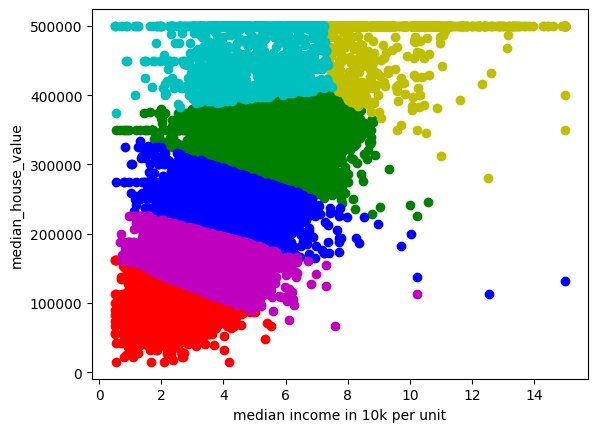

In [45]:
#showing the clusters using different colors
fig, ax= plt.subplots()
ax.scatter(data2_[label2==0,0], data2_[label2==0,1],c='red')
ax.scatter(data2_[label2==1,0], data2_[label2==1,1],c='green')
ax.scatter(data2_[label2==2,0], data2_[label2==2,1],c='blue')
ax.scatter(data2_[label2==3,0], data2_[label2==3,1],c='y')
ax.scatter(data2_[label2==4,0], data2_[label2==4,1],c='m')
ax.scatter(data2_[label2==5,0], data2_[label2==5,1],c='c')


plt.xlabel('median income in 10k per unit')
plt.ylabel('median_house_value')
plt.show()

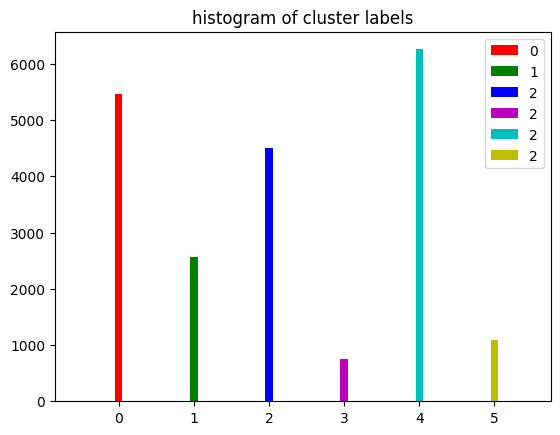

In [46]:
#plot the histogram of cluster labels
fig,ax=plt.subplots()
ax.hist(label2[label2==0],color='red',align='left',label='0')
ax.hist(label2[label2==1],color='green',align='left',label='1')
ax.hist(label2[label2==2],color='blue',align='left',label='2')
ax.hist(label2[label2==3],color='m',align='left',label='2')
ax.hist(label2[label2==4],color='c',align='left',label='2')
ax.hist(label2[label2==5],color='y',align='left',label='2')

ax.legend()
plt.title('histogram of cluster labels')
plt.show()

In [47]:

data3['cluster']=label2

/var/folders/6n/7_877_t5759dwptr6pjtd4b00000gn/T/ipykernel_1003/3019733826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['cluster']=label2


In [48]:
data3

,median_income,median_house_value,cluster
0,8.3252,452600.0,3
1,8.3014,358500.0,1
2,7.2574,352100.0,1
3,5.6431,341300.0,1
4,3.8462,342200.0,1
...,...,...,...
20635,1.5603,78100.0,0
20636,2.5568,77100.0,0
20637,1.7000,92300.0,0
20638,1.8672,84700.0,0


In [49]:
# compute the average value of 'median_income' in each cluster
data3.groupby('cluster')['median_income'].mean()

cluster
0    2.317734
1    5.458758
2    4.250620
3    9.788873
4    3.419053
5    4.863459
Name: median_income, dtype: float64

we can clearly see some clusters of high-income people

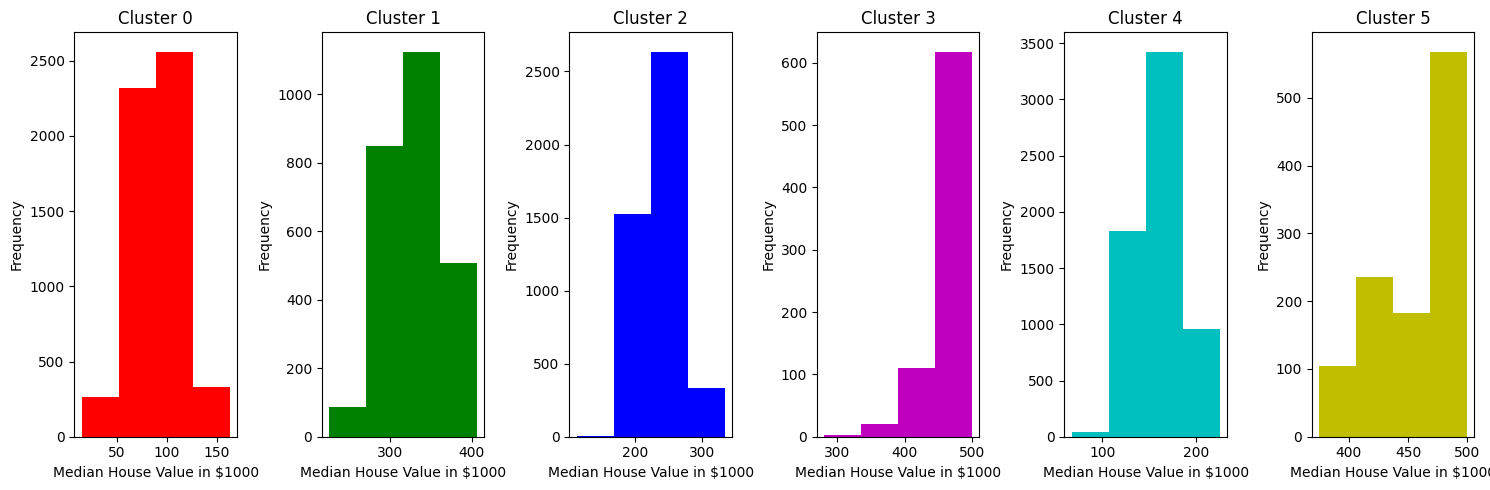

In [50]:
# showing the histogram of 'median_house_value' in each cluster
color=['r', 'g', 'b', 'm', 'c', 'y']
# Create subplots
fig, ax = plt.subplots(1, 6, figsize=(15, 5))

for k in range(0, 6):
    # Use the subplot axes to create histograms
    ax[k].hist(data3[data3['cluster'] == k]['median_house_value']/1000,bins=4,color=color[k])
    
    # Add labels and title to each subplot as needed
    ax[k].set_xlabel('Median House Value in $1000')
    ax[k].set_ylabel('Frequency')
    ax[k].set_title(f'Cluster {k}')

# Adjust layout if necessary
plt.tight_layout()
plt.show()

Some people have low income but live in very expensive houses